# 数据生成

In [5]:
from sklearn.datasets import make_multilabel_classification
import numpy as np

x, y = make_multilabel_classification(n_samples=20, n_features=2,
                                      n_labels=1, n_classes=1,
                                      random_state=2)  # 设置随机数种子，保证每次产生相同的数据。

# 根据类别分个类
index1 = np.array([index for (index, value) in enumerate(y) if value == 0])  # 获取类别1的indexs
index2 = np.array([index for (index, value) in enumerate(y) if value == 1])  # 获取类别2的indexs

c_1 = x[index1]   # 类别1的所有数据(x1, x2) in X_1
c_2 = x[index2]  # 类别2的所有数据(x1, x2) in X_2

# Fisher 算法实现

In [6]:
def cal_cov_and_avg(samples):
    """
    给定一个类别的数据，计算协方差矩阵和平均向量
    """
    u1 = np.mean(samples, axis=0)
    cov_m = np.zeros((samples.shape[1], samples.shape[1]))
    for s in samples:
        t = s - u1
        cov_m += t * t.reshape(2, 1)
    return cov_m, u1


def fisher(c_1, c_2):
    """
    fisher算法实现
    """
    cov_1, u1 = cal_cov_and_avg(c_1)
    cov_2, u2 = cal_cov_and_avg(c_2)
    s_w = cov_1 + cov_2
    u, s, v = np.linalg.svd(s_w)  # 奇异值分解
    s_w_inv = np.dot(np.dot(v.T, np.linalg.inv(np.diag(s))), u.T)
    return np.dot(s_w_inv, u1 - u2)

# 类别判定

In [7]:
def judge(sample, w, c_1, c_2):
    """
    true 属于1
    false 属于2
    """
    u1 = np.mean(c_1, axis=0)
    u2 = np.mean(c_2, axis=0)
    center_1 = np.dot(w.T, u1)
    center_2 = np.dot(w.T, u2)
    pos = np.dot(w.T, sample)
    return abs(pos - center_1) < abs(pos - center_2)


w = fisher(c_1, c_2)  # 调用函数，得到参数w
out = judge(c_1[1], w, c_1, c_2)   # 判断所属的类别
print(out)

True


# 绘图展示

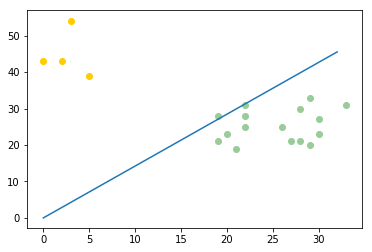

In [8]:
import matplotlib.pyplot as plt

plt.scatter(c_1[:, 0], c_1[:, 1], c='#99CC99')
plt.scatter(c_2[:, 0], c_2[:, 1], c='#FFCC00')
line_x = np.arange(min(np.min(c_1[:, 0]), np.min(c_2[:, 0])),
                   max(np.max(c_1[:, 0]), np.max(c_2[:, 0])),
                   step=1)

line_y = - (w[0] * line_x) / w[1]
plt.plot(line_x, line_y)
plt.show()